<a href="https://colab.research.google.com/github/shubhu1026/AI-ML/blob/main/Predict_Future_Prices_Using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Shubham Patel  
**Student Number:** n01624539

# Lab 5: Using FaceBook Prophet to Predict Future Prices

# Part #1: Lab OVERVIEW

![image.png](images/1.png)

# IMPORT LIBRARIES AND DATASET

### You must install fbprophet package alongside all other necessary apps. First, ensure you using Python 3.74

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
# Use the avocado.csv dataset provided for dataframes creation for both training and testing datasets
df = pd.read_csv('/content/avocado.csv')


- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [ ]:
# Let's view the head of the training dataset as shown below
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# Let's view the last elements in the training dataset as shown below
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [ ]:
# display the simple statistics summary as shown below
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
# Display the basic information as shown below
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
# Find all null values in each column/field as shown below
print(df.isnull().sum())

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


# EXPLORE DATASET  

In [ ]:
avocado_df = df.sort_values('Date')

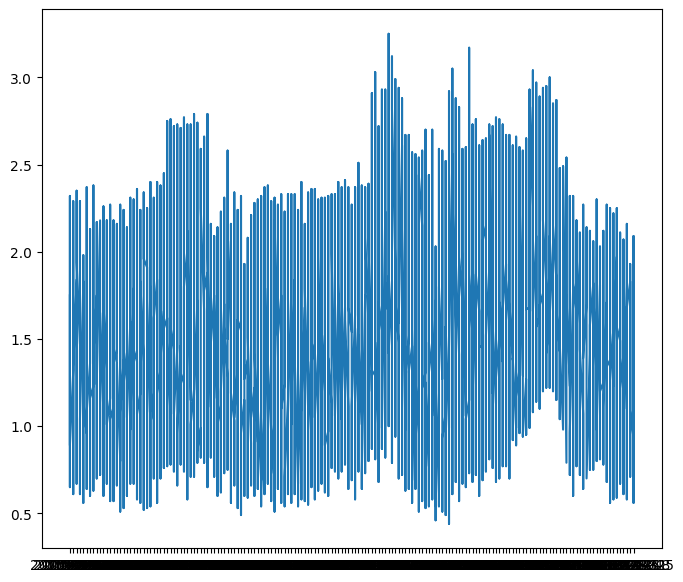

In [ ]:
# Plot date and average price shown below
plt.figure(figsize=(8, 7))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

<ipython-input-10-ac3b7e6f1378>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avocado_df['AveragePrice'], bins=50, kde=True, color='blue')


<Axes: xlabel='AveragePrice', ylabel='Density'>

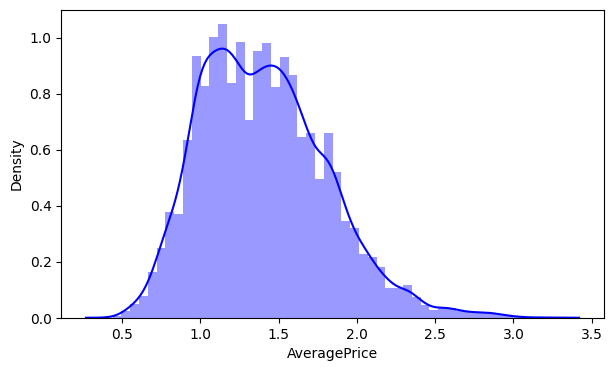

In [ ]:
# Display distPlot distribution of the average price as shown below
plt.figure(figsize=(7, 4))
sns.distplot(avocado_df['AveragePrice'], bins=50, kde=True, color='blue')

Text(0, 0.5, 'Average Price')

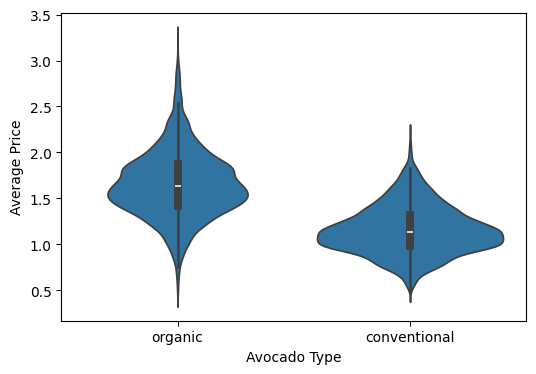

In [ ]:
# Plot a violin plot of the average price vs. avocado type as shown below
plt.figure(figsize=(6, 4))
sns.violinplot(x='type', y='AveragePrice', data=avocado_df)
plt.xlabel('Avocado Type')
plt.ylabel('Average Price')

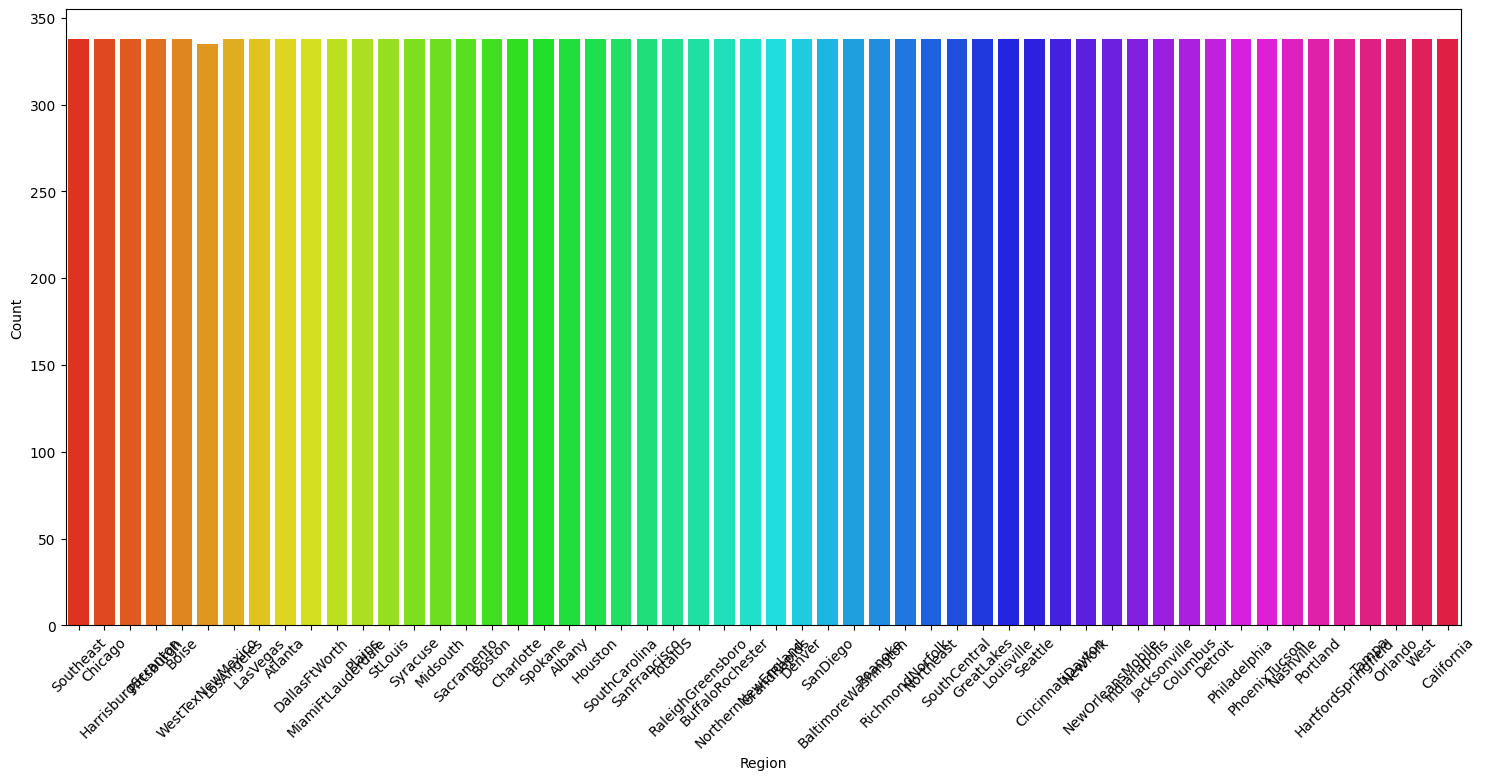

In [ ]:
# Display a Bar Chart to indicate the number of regions as shown below
plt.figure(figsize=(18, 8))
sns.countplot(x='region', hue='region', data=avocado_df, palette="hsv", legend=False)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

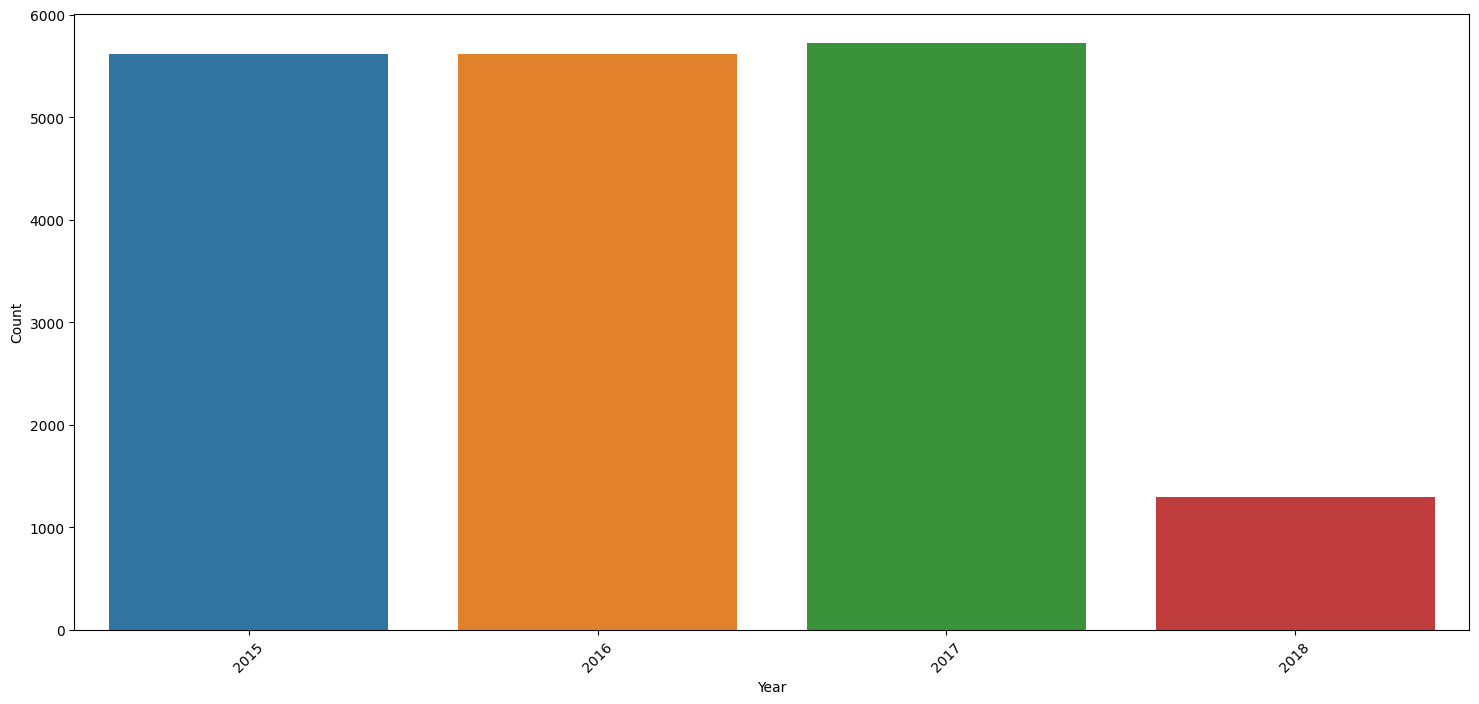

In [ ]:
# Display a Bar Chart to indicate the count in every year as shown below
plt.figure(figsize=(18, 8))
sns.countplot(x='year', hue='year', data=avocado_df, palette='tab10', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Avocado Prices vs. Regions (Conventional Avocados)')

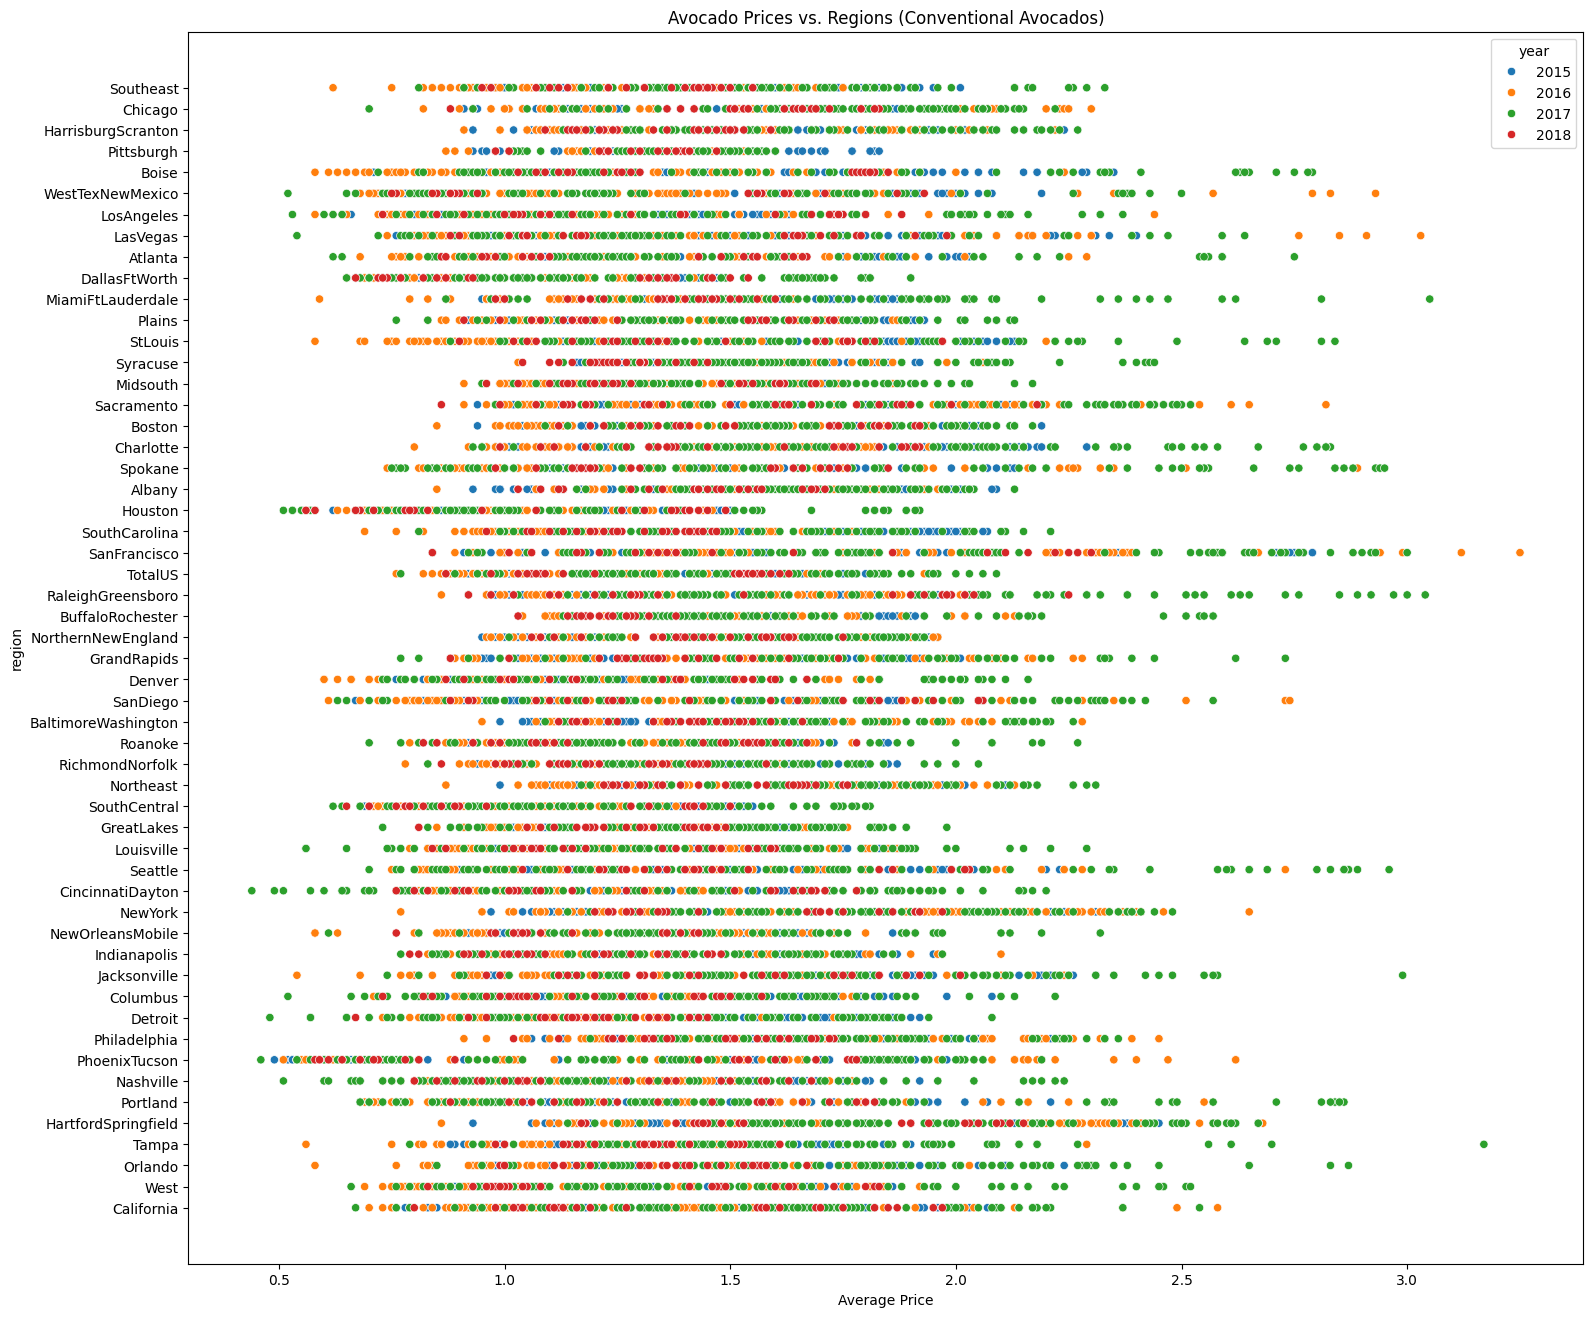

In [ ]:
 # Dispaly a plot the avocado prices vs. regions for conventional avocados as shown below
 plt.figure(figsize=(18, 16))
 sns.scatterplot(data=avocado_df, x="AveragePrice",y="region", hue="year", palette ='tab10')
 plt.xlabel("Average Price")
 plt.ylabel("region")
 plt.title("Avocado Prices vs. Regions (Conventional Avocados)")

In [ ]:
# Prepare and Print out the dataset as shown below
prophet_df=avocado_df.loc[:,'Date':'AveragePrice']
prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [ ]:
# Transform and display the dataset as shown below readying it to use the facebook prophet
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])
prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


![image.png](images/2.png)

![image.png](images/3.png)

![image.png](images/4.png)

# Part 6: DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [ ]:
# Develop the facebook prophet model here and fit it into the dataset
model = Prophet()

In [ ]:
# Forcasting into the future using the model you created above
model.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3kwg0p9b/kre1l3hk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3kwg0p9b/7fyxggsb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91412', 'data', 'file=/tmp/tmp3kwg0p9b/kre1l3hk.json', 'init=/tmp/tmp3kwg0p9b/7fyxggsb.json', 'output', 'file=/tmp/tmp3kwg0p9b/prophet_modelca8q_m5k/prophet_model-20250219204407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:44:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:44:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Display the forcast as shown below
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.501458,0.894802,1.900626,1.501458,1.501458,-0.117841,-0.117841,-0.117841,-0.117841,-0.117841,-0.117841,0.0,0.0,0.0,1.383616
1,2015-01-11,1.496064,0.897267,1.887793,1.496064,1.496064,-0.109453,-0.109453,-0.109453,-0.109453,-0.109453,-0.109453,0.0,0.0,0.0,1.386612
2,2015-01-18,1.490671,0.903538,1.872048,1.490671,1.490671,-0.109033,-0.109033,-0.109033,-0.109033,-0.109033,-0.109033,0.0,0.0,0.0,1.381639
3,2015-01-25,1.485278,0.841185,1.834255,1.485278,1.485278,-0.127702,-0.127702,-0.127702,-0.127702,-0.127702,-0.127702,0.0,0.0,0.0,1.357576
4,2015-02-01,1.479885,0.802046,1.787161,1.479885,1.479885,-0.155584,-0.155584,-0.155584,-0.155584,-0.155584,-0.155584,0.0,0.0,0.0,1.324300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.157864,0.564962,1.582614,0.952374,1.355988,-0.086071,-0.086071,-0.086071,-0.086071,-0.086071,-0.086071,0.0,0.0,0.0,1.071793
530,2019-03-22,1.157120,0.556307,1.593902,0.950666,1.356130,-0.084296,-0.084296,-0.084296,-0.084296,-0.084296,-0.084296,0.0,0.0,0.0,1.072824
531,2019-03-23,1.156375,0.576878,1.590512,0.949033,1.356756,-0.082246,-0.082246,-0.082246,-0.082246,-0.082246,-0.082246,0.0,0.0,0.0,1.074129
532,2019-03-24,1.155630,0.547270,1.626452,0.947337,1.357003,-0.079940,-0.079940,-0.079940,-0.079940,-0.079940,-0.079940,0.0,0.0,0.0,1.075690


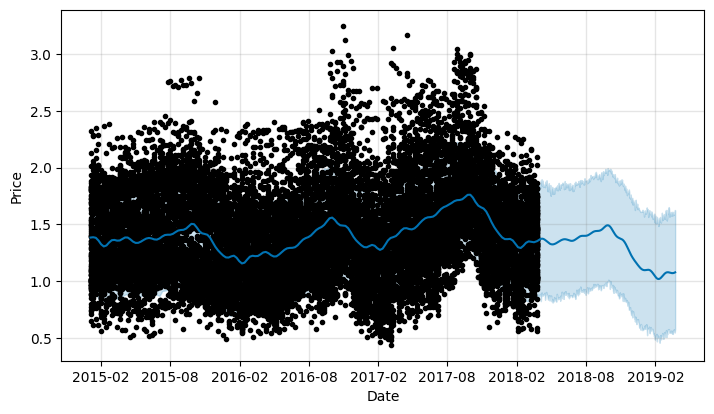

In [ ]:
# Print the below plot
fig = model.plot(forecast)
fig.set_size_inches(7, 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

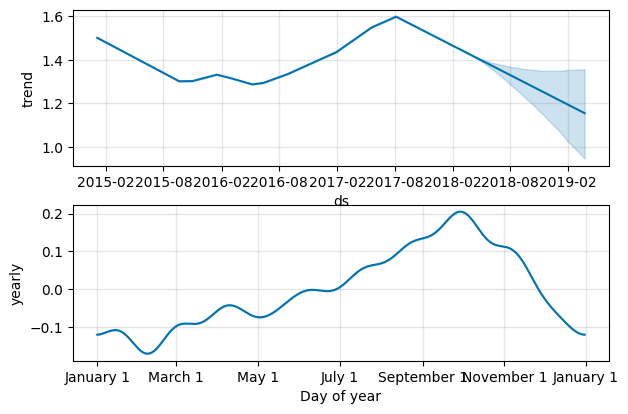

In [ ]:
# Display the trend, yearly and weekly components as shown below
figure = model.plot_components(forecast)
figure.set_size_inches(6, 4)
plt.show()

In [ ]:
# dataframes creation for both training and testing datasets
avocado_df = pd.read_csv('avocado.csv')

In [ ]:
# Using the original dataset, Select and create a dataframe for West region
west_avocado_df = avocado_df[avocado_df['region'] == 'West']

In [ ]:
# Prepare and display the below plots using the West region dataframe
avocado_df = west_avocado_df.sort_values('Date')

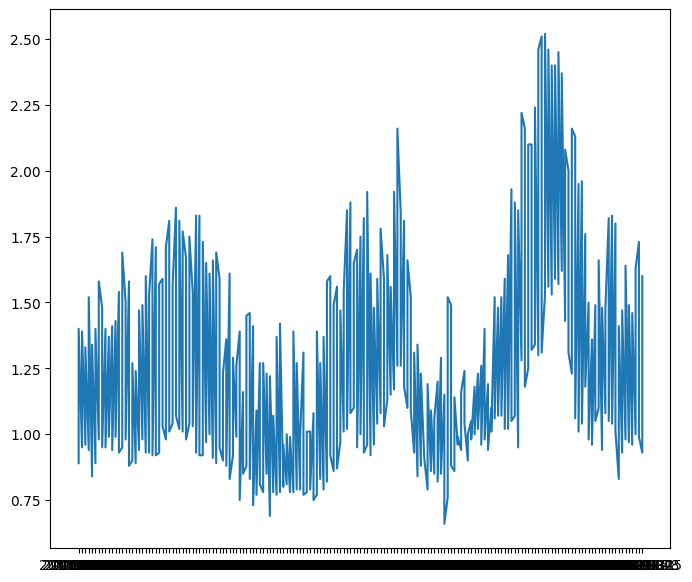

In [ ]:
plt.figure(figsize=(8, 7))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

<ipython-input-26-e0fb979b7830>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avocado_df['AveragePrice'], bins=50, kde=True, color='blue')


<Axes: xlabel='AveragePrice', ylabel='Density'>

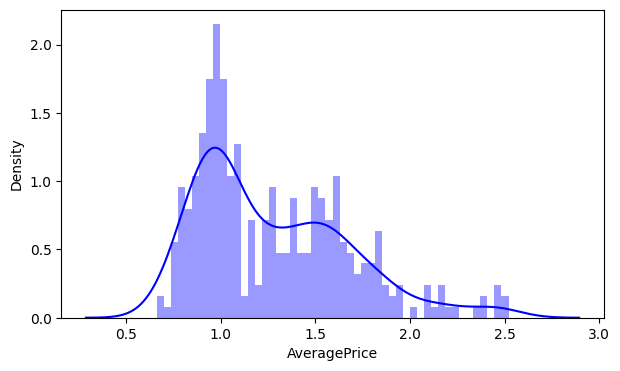

In [ ]:
plt.figure(figsize=(7, 4))
sns.distplot(avocado_df['AveragePrice'], bins=50, kde=True, color='blue')

Text(0, 0.5, 'Average Price')

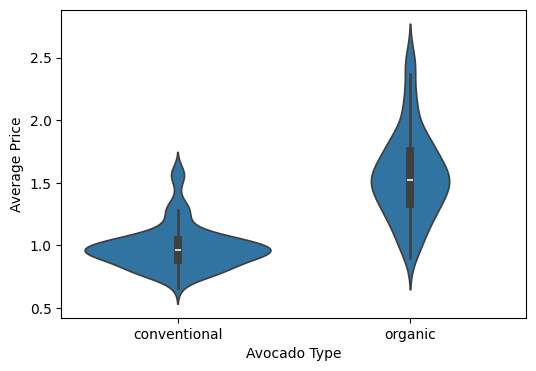

In [ ]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='type', y='AveragePrice', data=avocado_df)
plt.xlabel('Avocado Type')
plt.ylabel('Average Price')

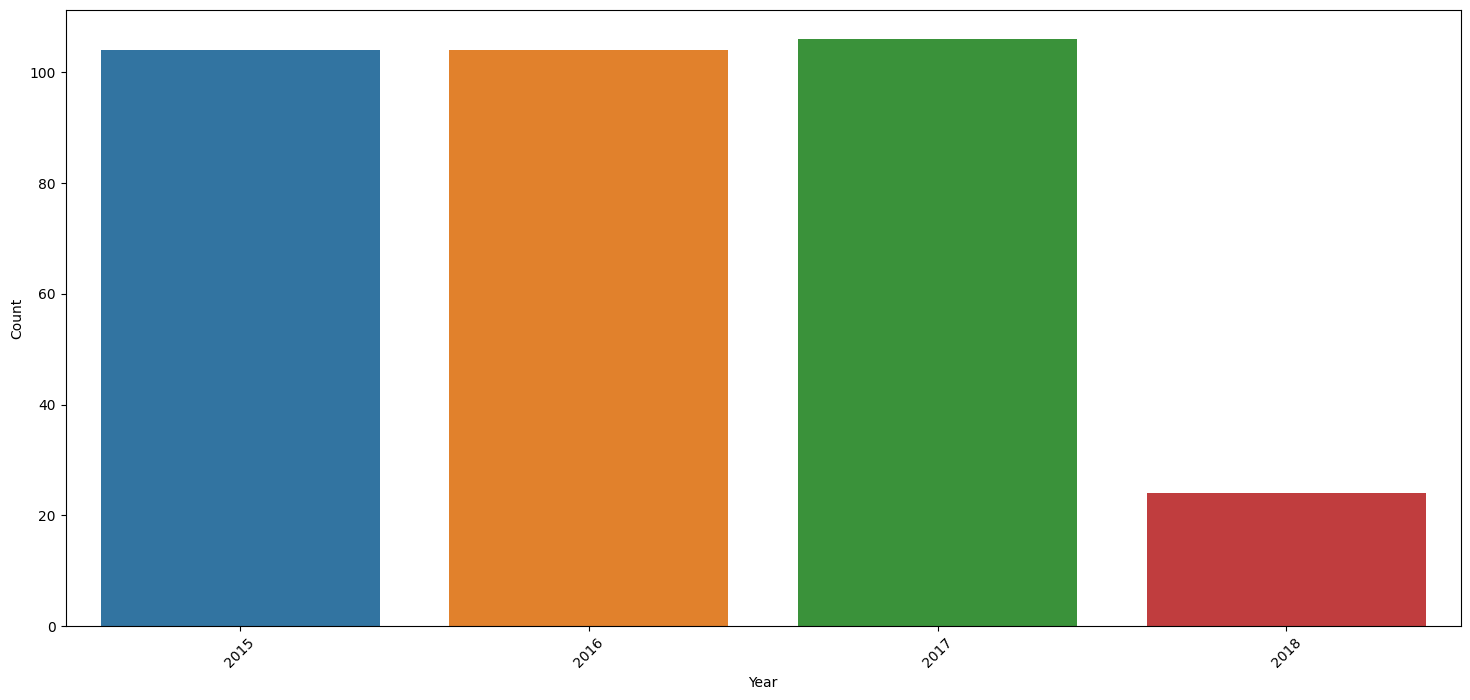

In [ ]:
plt.figure(figsize=(18, 8))
sns.countplot(x='year', hue='year', data=avocado_df, palette='tab10', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
# convert the dataframe into facebook prophet format and display it as shown below
west_prophet_df=west_avocado_df.loc[:,'Date':'AveragePrice']
west_prophet_df = west_prophet_df.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})
west_prophet_df['ds'] = pd.to_datetime(west_prophet_df['ds'])
west_prophet_df

,ds,y
2704,2015-12-27,0.83
2705,2015-12-20,0.88
2706,2015-12-13,0.85
2707,2015-12-06,0.75
2708,2015-11-29,0.99
...,...,...
18232,2018-02-04,1.41
18233,2018-01-28,1.80
18234,2018-01-21,1.83
18235,2018-01-14,1.82


In [ ]:
# create the facebook prophet model, fit it into the dataset and create future forecast
west_model = Prophet()

In [ ]:
west_model.fit(west_prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3kwg0p9b/autmraj2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3kwg0p9b/0qlufrar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65877', 'data', 'file=/tmp/tmp3kwg0p9b/autmraj2.json', 'init=/tmp/tmp3kwg0p9b/0qlufrar.json', 'output', 'file=/tmp/tmp3kwg0p9b/prophet_model9xvgl98z/prophet_model-20250219204415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:44:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:44:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
west_future = west_model.make_future_dataframe(periods=365, freq='D')
west_forecast = west_model.predict(west_future)
west_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.244731,0.657436,1.467596,1.244731,1.244731,-0.184899,-0.184899,-0.184899,-0.184899,-0.184899,-0.184899,0.0,0.0,0.0,1.059833
1,2015-01-11,1.243888,0.659451,1.497774,1.243888,1.243888,-0.165306,-0.165306,-0.165306,-0.165306,-0.165306,-0.165306,0.0,0.0,0.0,1.078583
2,2015-01-18,1.243045,0.641244,1.507656,1.243045,1.243045,-0.156117,-0.156117,-0.156117,-0.156117,-0.156117,-0.156117,0.0,0.0,0.0,1.086928
3,2015-01-25,1.242202,0.619629,1.501946,1.242202,1.242202,-0.168804,-0.168804,-0.168804,-0.168804,-0.168804,-0.168804,0.0,0.0,0.0,1.073398
4,2015-02-01,1.241359,0.622051,1.483606,1.241359,1.241359,-0.191199,-0.191199,-0.191199,-0.191199,-0.191199,-0.191199,0.0,0.0,0.0,1.050161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.735711,1.116797,1.937529,1.711185,1.763977,-0.204399,-0.204399,-0.204399,-0.204399,-0.204399,-0.204399,0.0,0.0,0.0,1.531312
530,2019-03-22,1.736289,1.126521,1.984869,1.711671,1.764644,-0.199313,-0.199313,-0.199313,-0.199313,-0.199313,-0.199313,0.0,0.0,0.0,1.536977
531,2019-03-23,1.736867,1.087921,1.986149,1.712132,1.765312,-0.193660,-0.193660,-0.193660,-0.193660,-0.193660,-0.193660,0.0,0.0,0.0,1.543207
532,2019-03-24,1.737445,1.148022,1.972127,1.712577,1.765979,-0.187547,-0.187547,-0.187547,-0.187547,-0.187547,-0.187547,0.0,0.0,0.0,1.549898


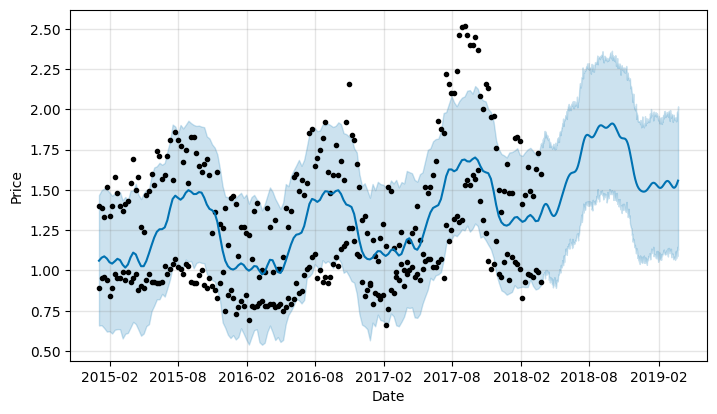

In [ ]:
fig = west_model.plot(west_forecast)
fig.set_size_inches(7, 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

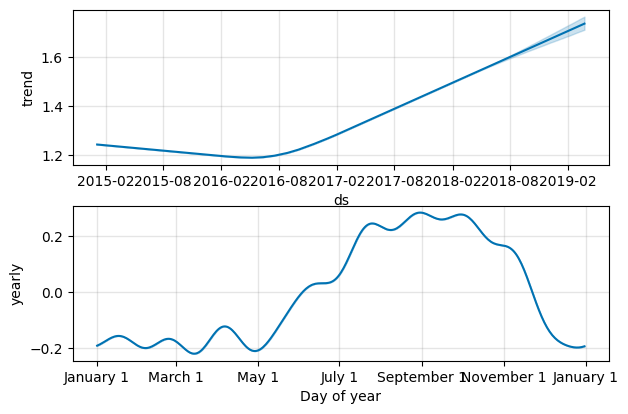

In [ ]:
# Display the trend, yearly and weekly components for the Western region as shown below
figure = west_model.plot_components(west_forecast)
figure.set_size_inches(6, 4)
plt.show()